# Ideal Customers Cluster (K-means)

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [248]:
df = pd.read_csv("marketing_campaign.csv")
display(df)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### Dataframe Information

In [249]:
# ID: Customer's unique identifier
# Year_Birth: Customer's birth year
# Education: Customer's education level
# Marital_Status: Customer's marital status
# Income: Customer's yearly household income
# Kidhome: Number of children in customer's household
# Teenhome: Number of teenagers in customer's household
# Dt_Customer: Date of customer's enrollment with the company
# Recency: Number of days since customer's last purchase
# Complain: 1 if the customer complained in the last 2 years, 0 otherwise
# MntWines: Amount spent on wine in last 2 years
# MntFruits: Amount spent on fruits in last 2 years
# MntMeatProducts: Amount spent on meat in last 2 years
# MntFishProducts: Amount spent on fish in last 2 years
# MntSweetProducts: Amount spent on sweets in last 2 years
# MntGoldProds: Amount spent on gold in last 2 years
# NumDealsPurchases: Number of purchases made with a discount
# AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
# AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
# AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
# AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
# AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
# Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
# NumWebPurchases: Number of purchases made through the companys website
# NumCatalogPurchases: Number of purchases made using a catalogue
# NumStorePurchases: Number of purchases made directly in stores
# NumWebVisitsMonth: Number of visits to companys website in the last month

In [250]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [251]:
df.duplicated().value_counts()

False    2240
dtype: int64

In [252]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### Data cleaning and treament

In [253]:
df = df.set_index('ID')
display(df)

# Set "ID" column as the index in order identify the clients after the analysis

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,5,0,0,0,0,0,0,3,11,0
4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,7,0,0,0,1,0,0,3,11,0
7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,6,0,1,0,0,0,0,3,11,0


In [254]:
df['Income'].fillna(df['Income'].mean(), inplace=True)
df.isnull().sum()

# Fullfil the null values in the "Income" column with its mean

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [255]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], infer_datetime_format=True).dt.strftime("%Y%m%d") # Change the datetime to a Ymd format
display(df)

C:\Users\User W10\AppData\Local\Temp\ipykernel_6312\3216764293.py:1: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], infer_datetime_format=True).dt.strftime("%Y%m%d") # Change the datetime to a Ymd format
C:\Users\User W10\AppData\Local\Temp\ipykernel_6312\3216764293.py:1: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], infer_datetime_format=True).dt.strftime("%Y%m%d") # Change the datetime to a Ymd format
C:\Users\User W10\AppData\Local\Temp\ipykernel_6312\3216764293.py:1: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], infer_datetime_format=True).dt.strftime("%Y%m%d") 

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,20120409,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,20140803,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,20130821,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,20141002,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,20140119,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduation,Married,61223.0,0,1,20130613,46,709,43,...,5,0,0,0,0,0,0,3,11,0
4001,1946,PhD,Together,64014.0,2,1,20141006,56,406,0,...,7,0,0,0,1,0,0,3,11,0
7270,1981,Graduation,Divorced,56981.0,0,0,20140125,91,908,48,...,6,0,1,0,0,0,0,3,11,0


### Outliers

In [256]:
quant = []

for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        quant.append(i)
    else:
        pass

df_quant = df[quant]

# Creates a dataframe with the quantitative datas

In [257]:
outliers = []

for i in df_quant.columns:
    q3 = np.quantile(df_quant[i], 0.75)
    q1 = np.quantile(df_quant[i], 0.25)
    dist = q3 - q1
    upper_lim = q3 + 1.5*dist
    lower_lim = q1 - 1.5*dist
    
    outlier = 0
    
    for j in df_quant.index:
        if df_quant[i][j] < lower_lim or df_quant[i][j] > upper_lim:
            outlier += 1
        else:
            pass
        
    outliers.append(outlier)
    
df_outliers = pd.DataFrame()
df_outliers['variables'] = df_quant.columns
df_outliers['outliers'] = outliers
df_outliers['percentage'] = (outliers/df.Year_Birth.count())*100

display(df_outliers)

,variables,outliers,percentage
0,Year_Birth,3,0.133929
1,Income,8,0.357143
2,Kidhome,0,0.000000
3,Teenhome,0,0.000000
4,Recency,0,0.000000
5,MntWines,35,1.562500
6,MntFruits,227,10.133929
7,MntMeatProducts,175,7.812500
8,MntFishProducts,223,9.955357
9,MntSweetProducts,248,11.071429


In [258]:
check_list = []

for i in df_outliers.index:
    if df_outliers.outliers[i] != 0:
        check_list.append(df_outliers.variables[i])
    else:
        pass

df_removed = df.copy()

for i in check_list:

    q3 = np.quantile(df_removed[i], 0.75)
    q1 = np.quantile(df_removed[i], 0.25)
    dist = q3 - q1
    upper_lim = q3 + 1.5*dist
    lower_lim = q1 - 1.5*dist

    for j in df_removed.index:

        if df_removed[i][j] > upper_lim or df_removed[i][j] < lower_lim:
            df_removed = df_removed.drop(j)         
        else:
            pass

display(df_removed)

# Removing outliers before applying the method. K-means are sensitiy to outliers. It is not the best practice to simply
# remove the, but this is being done to show the method's implementation.

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
2174,1954,Graduation,Single,46344.000000,1,1,20140803,38,11,1,...,5,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.000000,1,0,20141002,26,11,4,...,6,0,0,0,0,0,0,3,11,0
6177,1985,PhD,Married,33454.000000,1,0,20130805,32,76,10,...,8,0,0,0,0,0,0,3,11,0
1994,1983,Graduation,Married,52247.251354,1,0,20131115,11,5,5,...,7,0,0,0,0,0,0,3,11,0
387,1976,Basic,Married,7500.000000,0,0,20121113,59,6,16,...,8,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10659,1979,2n Cycle,Together,7500.000000,1,0,20130705,7,2,8,...,7,0,0,0,0,0,0,3,11,0
1448,1963,Master,Married,33562.000000,1,2,20140625,33,21,12,...,4,0,0,0,0,0,0,3,11,0
10084,1972,Graduation,Married,24434.000000,2,0,20140518,9,3,2,...,7,0,0,0,0,0,0,3,11,0


### Treating categorical data

In [259]:
df_dtypes = pd.DataFrame(df_removed.dtypes).reset_index().rename(columns={'index':'column_name', 0:'data_type'}) 
display(df_dtypes)

# Create a dataframe to check data type

,column_name,data_type
0,Year_Birth,int64
1,Education,object
2,Marital_Status,object
3,Income,float64
4,Kidhome,int64
5,Teenhome,int64
6,Dt_Customer,object
7,Recency,int64
8,MntWines,int64
9,MntFruits,int64


In [260]:
all_labelencoders = {}
columns = []

for i in df_dtypes.index:
  if df_dtypes.data_type[i] == 'object':
    columns.append(df_dtypes.column_name[i]) # Save the categorical columns' names in order to reverse, if necessary
    le = LabelEncoder()
    all_labelencoders[df_dtypes.column_name[i]] = le
    le.fit(df_removed[df_dtypes.column_name[i]])
    df_removed[df_dtypes.column_name[i]] = le.transform(df_removed[df_dtypes.column_name[i]])
  else:
    pass

# Apply label encoder to the categorical variables

display(df_removed)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
2174,1954,2,3,46344.000000,1,1,464,38,11,1,...,5,0,0,0,0,0,0,3,11,0
6182,1984,2,4,26646.000000,1,0,472,26,11,4,...,6,0,0,0,0,0,0,3,11,0
6177,1985,4,2,33454.000000,1,0,240,32,76,10,...,8,0,0,0,0,0,0,3,11,0
1994,1983,2,2,52247.251354,1,0,321,11,5,5,...,7,0,0,0,0,0,0,3,11,0
387,1976,1,2,7500.000000,0,0,58,59,6,16,...,8,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10659,1979,0,4,7500.000000,1,0,216,7,2,8,...,7,0,0,0,0,0,0,3,11,0
1448,1963,3,2,33562.000000,1,2,454,33,21,12,...,4,0,0,0,0,0,0,3,11,0
10084,1972,2,2,24434.000000,2,0,433,9,3,2,...,7,0,0,0,0,0,0,3,11,0


### K-means

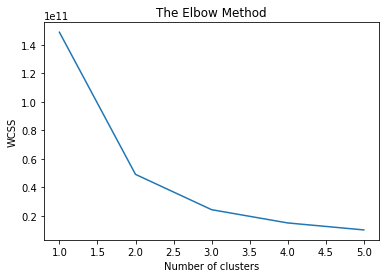

In [261]:
WCSS = []

for i in range(1, 6):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(df_removed)
  WCSS.append(kmeans.inertia_)

plt.plot(range(1, 6), WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# The Elbow Metthod for set the number of clusters tha are going to be used in the K-menas method

In [262]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
y_means = kmeans.fit_predict(df_removed)

### Reverting Label Encoder

In [263]:
for i in columns:
  df_removed[i] = all_labelencoders[i].inverse_transform(df_removed[i])

df_removed['cluster'] = y_means

display(df_removed)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,cluster
ID,,,,,,,,,,,,,,,,,,,,,
2174,1954,Graduation,Single,46344.000000,1,1,20140803,38,11,1,...,0,0,0,0,0,0,3,11,0,3
6182,1984,Graduation,Together,26646.000000,1,0,20141002,26,11,4,...,0,0,0,0,0,0,3,11,0,2
6177,1985,PhD,Married,33454.000000,1,0,20130805,32,76,10,...,0,0,0,0,0,0,3,11,0,2
1994,1983,Graduation,Married,52247.251354,1,0,20131115,11,5,5,...,0,0,0,0,0,0,3,11,0,0
387,1976,Basic,Married,7500.000000,0,0,20121113,59,6,16,...,0,0,0,0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10659,1979,2n Cycle,Together,7500.000000,1,0,20130705,7,2,8,...,0,0,0,0,0,0,3,11,0,1
1448,1963,Master,Married,33562.000000,1,2,20140625,33,21,12,...,0,0,0,0,0,0,3,11,0,2
10084,1972,Graduation,Married,24434.000000,2,0,20140518,9,3,2,...,0,0,0,0,0,0,3,11,0,1


### Results

In [274]:
df1 = df_removed.groupby('cluster', as_index=False)['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'].sum()
display(df1)

C:\Users\User W10\AppData\Local\Temp\ipykernel_6312\3353506813.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = df_removed.groupby('cluster', as_index=False)['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'].sum()


,cluster,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,26434,910,7188,1133,811,2809
1,1,1838,1141,2388,1490,995,2413
2,2,8183,1123,5567,1689,1090,3054
3,3,17748,1079,7920,1619,1011,3880


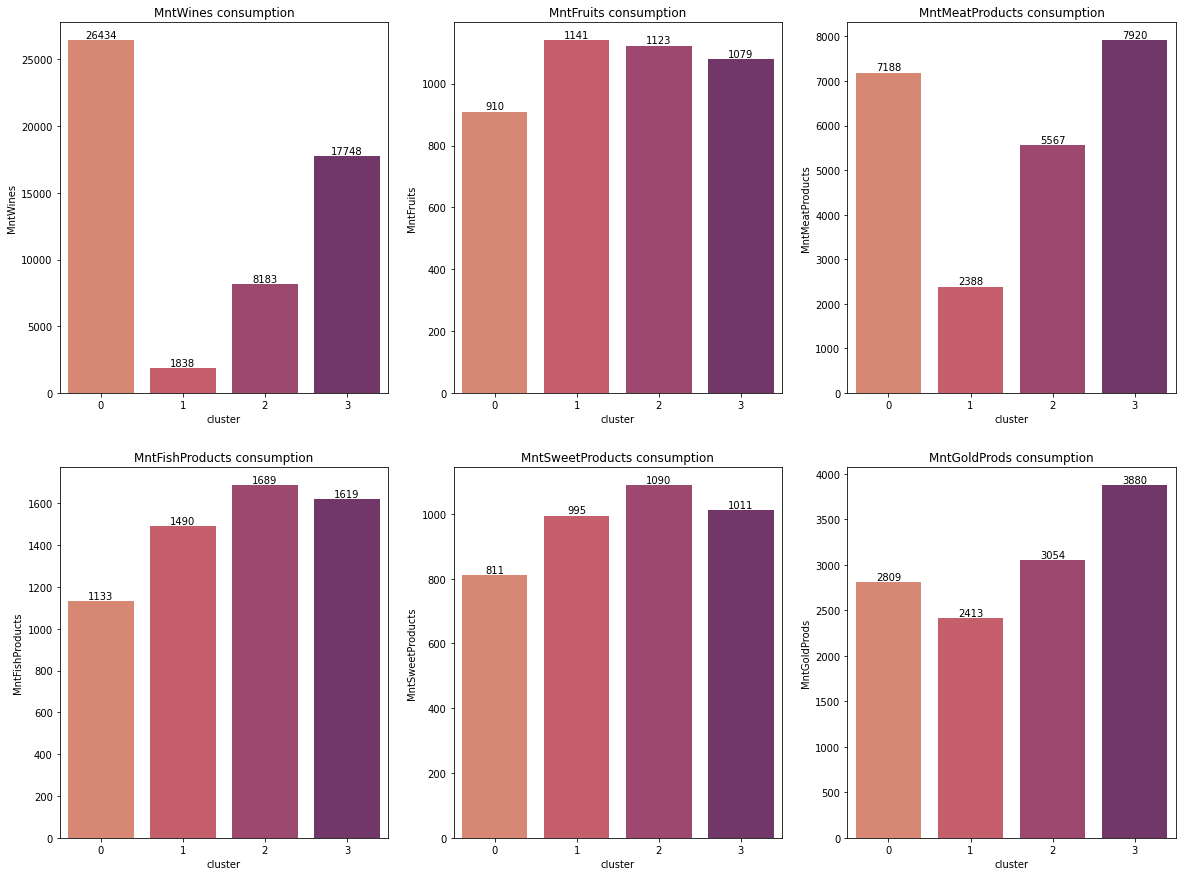

In [285]:
i,j = 2,3

fig, axis = plt.subplots(i, j, figsize=(20, 15))

column_start = 1

for x in range(i):
  for y in range(j):
    axis[x,y].set_title(df1.columns[column_start] + ' consumption')
    sns.barplot(ax=axis[x,y], data=df1, x='cluster', y=df1.columns[column_start], palette='flare')
    for z in axis[x,y].containers:
      axis[x,y].bar_label(z)
    column_start += 1

# Shows how the main products are comsumed by cluster, allowing to make specific propaganda for each.

In [290]:
df2 = df_removed.groupby('cluster', as_index=False)['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases'].sum()
display(df2)

C:\Users\User W10\AppData\Local\Temp\ipykernel_6312\2088339683.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df_removed.groupby('cluster', as_index=False)['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases'].sum()


,cluster,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases
0,0,579,166,809,375
1,1,346,65,584,389
2,2,529,93,924,553
3,3,653,149,917,569


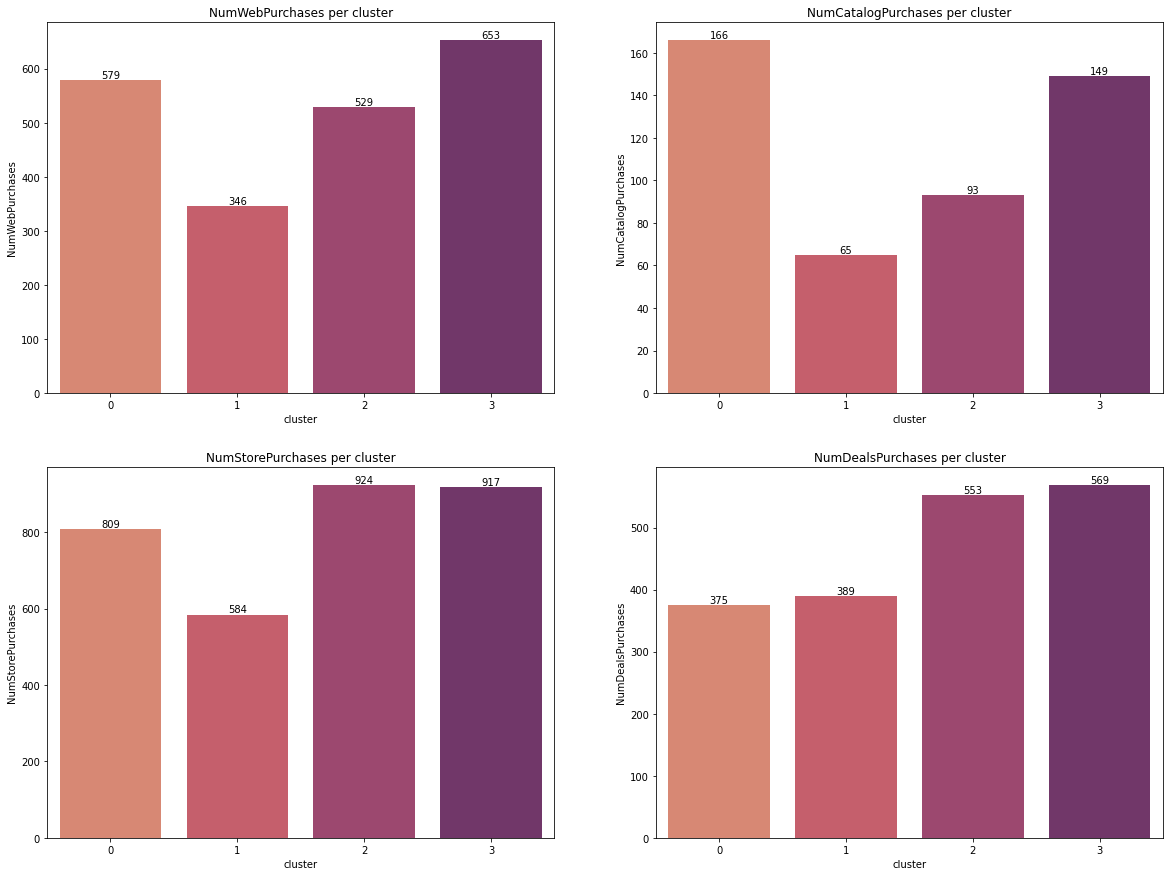

In [291]:
i,j = 2,2

fig, axis = plt.subplots(i, j, figsize=(20, 15))

column_start = 1

for x in range(i):
  for y in range(j):
    axis[x,y].set_title(df2.columns[column_start] + ' per cluster')
    sns.barplot(ax=axis[x,y], data=df2, x='cluster', y=df2.columns[column_start], palette='flare')
    for z in axis[x,y].containers:
      axis[x,y].bar_label(z)
    column_start += 1

# Show how the clusters buy their products and how many of then are buying using discounts.

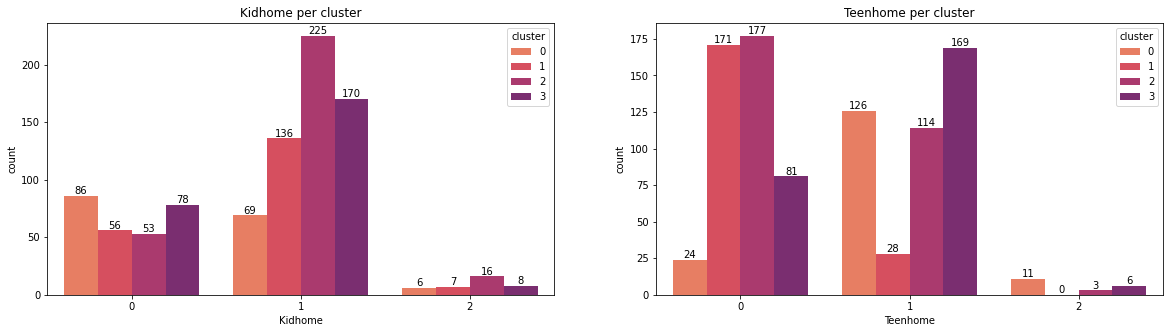

In [289]:
i,j = 1,2

fig, axis = plt.subplots(i, j, figsize=(20, 5))

column_start = 4

for k in range(j):
    axis[k].set_title(df_removed.columns[column_start] + ' per cluster')
    sns.countplot(ax=axis[k], data=df_removed, x=df_removed.columns[column_start], hue='cluster', palette='flare', saturation=1)
    for z in axis[k].containers:
        axis[k].bar_label(z)
    column_start += 1

# Show how many children and teenagers are in each cluster. 